In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive


#Mount Google Drive
drive.mount('/content/MyDrive/')

Drive already mounted at /content/MyDrive/; to attempt to forcibly remount, call drive.mount("/content/MyDrive/", force_remount=True).


In [3]:
# Define the path to the excel file (replace with your file path on Google Drive)
file_path = '/content/MyDrive/MyDrive/df2-filtered.csv'

In [4]:
# Read the .csv file into a DataFrame
df = pd.read_csv(file_path)

In [5]:
df.head()

Datetime  Site  AQI  City_Centre_TVCount  NO  NO2  NOx  PM10  \
0  2018-01-01 00:00:00  QUS2  NaN              29053.0 NaN  NaN  NaN   NaN   
1  2018-01-01 01:00:00  QUS2  NaN              26201.0 NaN  NaN  NaN   NaN   
2  2018-01-01 02:00:00  QUS2  NaN              16591.0 NaN  NaN  NaN   NaN   
3  2018-01-01 03:00:00  QUS2  NaN              11818.0 NaN  NaN  NaN   NaN   
4  2018-01-01 04:00:00  QUS2  NaN               9065.0 NaN  NaN  NaN   NaN   

   PM2.5  RH  Temp  Total_Pedestrians  TrafficV  WD   WS  
0    NaN NaN   NaN             1071.0     912.0 NaN  0.2  
1    NaN NaN   NaN              561.0     651.0 NaN  0.3  
2    NaN NaN   NaN              373.0    1219.0 NaN  0.2  
3    NaN NaN   NaN              233.0    1485.0 NaN  0.3  
4    NaN NaN   NaN              184.0    1269.0 NaN  0.2

In [6]:
dfPD = df[['Datetime', 'Total_Pedestrians']]

In [7]:
# Save  CSV file
dfPD.to_csv('dfPD.csv', index=False)

print("DataFrame saved as 'dfPD.csv'.")

DataFrame saved as 'dfPD.csv'.


In [8]:
# Define the path to the excel file (replace with your file path on Google Drive)
file_path = '/content/MyDrive/MyDrive/dfPD.csv'

In [9]:
# Read the .csv file into a DataFrame
dfPD = pd.read_csv(file_path)

In [10]:
dfPD.head()

Datetime  Total_Pedestrians
0  2018-01-01 00:00:00             1071.0
1  2018-01-01 01:00:00              561.0
2  2018-01-01 02:00:00              373.0
3  2018-01-01 03:00:00              233.0
4  2018-01-01 04:00:00              184.0

                  Datetime  Total_Pedestrians
0      2018-01-01 00:00:00             1071.0
1      2018-01-01 01:00:00              561.0
2      2018-01-01 02:00:00              373.0
3      2018-01-01 03:00:00              233.0
4      2018-01-01 04:00:00              184.0
...                    ...                ...
45212  2023-02-27 20:00:00             5769.0
45213  2023-02-27 21:00:00             4700.0
45214  2023-02-27 22:00:00             2377.0
45215  2023-02-27 23:00:00             1119.0
45216  2023-02-28 00:00:00              660.0

[45217 rows x 2 columns]

Missing Values per Column:
Datetime               0
Total_Pedestrians    144
dtype: int64

Percentage of Missing Values per Column:
Datetime             0.000000
Total_Pedestrians    0.318464
dtype: float64

Rows with Missing Values:
                  Datetime  Total_Pedestrians
9576   2019-02-04 00:00:00                NaN
9577   2019-02-04 01:00:00                NaN
9578   2019-02-04 02:00:00                NaN
957

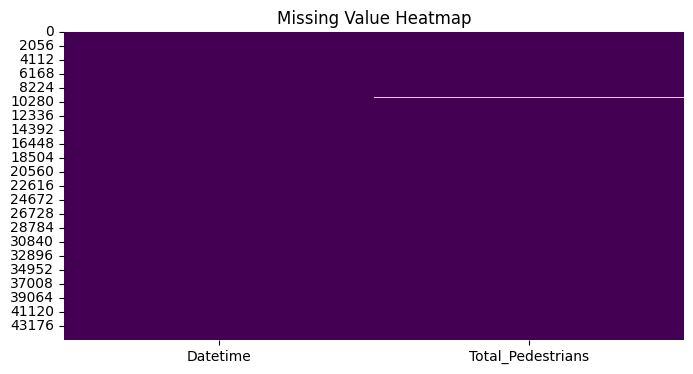


Pattern of Missingness:
0    45073
1      144
Name: count, dtype: int64


In [11]:
print(dfPD)

# Total missing values per column
print("\nMissing Values per Column:")
print(dfPD.isnull().sum())

# Percentage of missing values per column
print("\nPercentage of Missing Values per Column:")
print(dfPD.isnull().mean() * 100)

# Rows with missing values
print("\nRows with Missing Values:")
print(dfPD[dfPD.isnull().any(axis=1)])

# Visualize missingness
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.heatmap(dfPD.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

# Check patterns of missingness
print("\nPattern of Missingness:")
print(dfPD.isnull().sum(axis=1).value_counts())

In [12]:
# Count total missing values in the DataFrame
total_missing_values = dfPD.isna().sum().sum()
print(f"Total missing values: {total_missing_values}")

# Count total values in the DataFrame (total number of elements)
total_values = dfPD.size  # Total number of elements in the DataFrame
print("Total values in DataFrame:", total_values)

# Calculate percentage of missing values
missing_percentage = (total_missing_values / total_values) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")

Total missing values: 144
Total values in DataFrame: 90434
Percentage of missing values: 0.16%


In [13]:
dfPD['Total_Pedestrians'] = dfPD['Total_Pedestrians'].fillna(method='bfill')

<ipython-input-13-4c1528f4c912>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfPD['Total_Pedestrians'] = dfPD['Total_Pedestrians'].fillna(method='bfill')


In [14]:
# Count total missing values in the DataFrame
total_missing_values = dfPD.isna().sum().sum()
print(f"Total missing values: {total_missing_values}")

# Count total values in the DataFrame (total number of elements)
total_values = dfPD.size  # Total number of elements in the DataFrame
print("Total values in DataFrame:", total_values)

# Calculate percentage of missing values
missing_percentage = (total_missing_values / total_values) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")

Total missing values: 0
Total values in DataFrame: 90434
Percentage of missing values: 0.00%


In [15]:
dfPD = dfPD.drop_duplicates(subset='Datetime', keep='first')

In [16]:
#Peak Pedestrian Times
peak_time = dfPD.loc[dfPD['Total_Pedestrians'].idxmax()]
print("Peak pedestrian time:", peak_time)


Peak pedestrian time: Datetime             2019-02-26 17:00:00
Total_Pedestrians                26634.0
Name: 10121, dtype: object


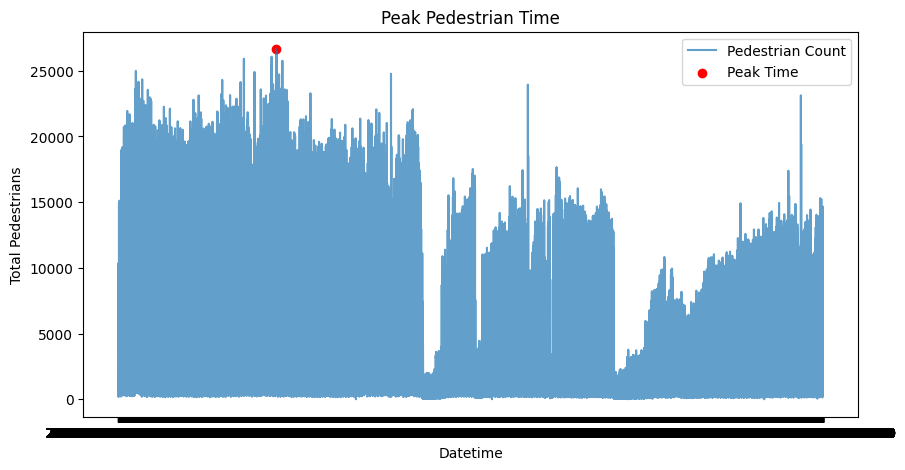

In [17]:
#Peak Pedestrian Times
import matplotlib.pyplot as plt

peak_time = dfPD.loc[dfPD['Total_Pedestrians'].idxmax()]
plt.figure(figsize=(10, 5))
plt.plot(dfPD['Datetime'], dfPD['Total_Pedestrians'], label='Pedestrian Count', alpha=0.7)
plt.scatter(peak_time['Datetime'], peak_time['Total_Pedestrians'], color='red', label='Peak Time')
plt.xlabel('Datetime')
plt.ylabel('Total Pedestrians')
plt.title('Peak Pedestrian Time')
plt.legend()
plt.show()


In [18]:
#Yearly Total Pedestrian Count
dfPD['Year'] = pd.to_datetime(dfPD['Datetime']).dt.year
yearly_counts = dfPD.groupby('Year')['Total_Pedestrians'].sum()
print(yearly_counts)


Year
2018    73432642.0
2019    69792191.0
2020    44554704.0
2021    35483932.0
2022    39401372.0
2023     7677495.0
Name: Total_Pedestrians, dtype: float64


<ipython-input-19-9bad18cadd55>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_counts.index, y=yearly_counts.values, palette='viridis')


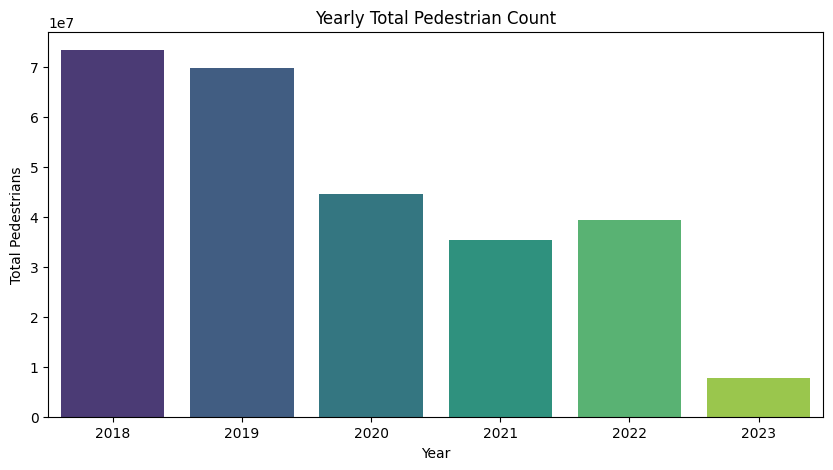

In [19]:
#Yearly Total Pedestrian Count
import seaborn as sns

dfPD['Year'] = pd.to_datetime(dfPD['Datetime']).dt.year
yearly_counts = dfPD.groupby('Year')['Total_Pedestrians'].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Total Pedestrians')
plt.title('Yearly Total Pedestrian Count')
plt.show()


In [20]:
# Average Pedestrians by Hour of Day
dfPD['Hour'] = pd.to_datetime(dfPD['Datetime']).dt.hour
hourly_avg = dfPD.groupby('Hour')['Total_Pedestrians'].mean()
print(hourly_avg)


Hour
0      2025.293899
1      1517.982484
2      1122.527070
3       776.629512
4       575.655520
5       596.404459
6      1800.848726
7      4345.915074
8      7807.412951
9      6416.288217
10     7133.818471
11     8574.457006
12    11523.553609
13    11552.753715
14    10400.411890
15    10909.703822
16    11909.961253
17    12535.746815
18     9059.921975
19     6742.860403
20     5524.679406
21     4388.514331
22     3495.852442
23     2755.540870
Name: Total_Pedestrians, dtype: float64


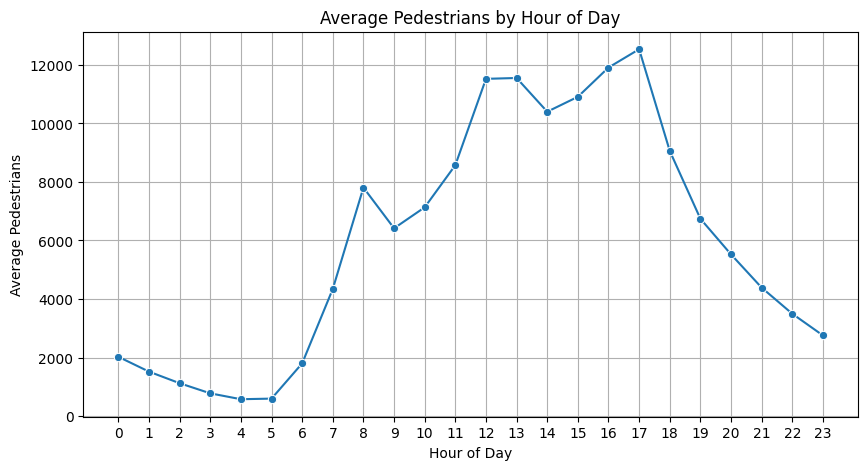

In [21]:
# Average Pedestrians by Hour of Day
dfPD['Hour'] = pd.to_datetime(dfPD['Datetime']).dt.hour
hourly_avg = dfPD.groupby('Hour')['Total_Pedestrians'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average Pedestrians')
plt.title('Average Pedestrians by Hour of Day')
plt.xticks(range(0, 24))
plt.grid()
plt.show()


In [22]:
#Trend Analysis Over Time
dfPD['Datetime'] = pd.to_datetime(dfPD['Datetime'])
monthly_trend = dfPD.set_index('Datetime').resample('M')['Total_Pedestrians'].mean()
print(monthly_trend)


Datetime
2018-01-31    8002.842742
2018-02-28    9040.345238
2018-03-31    9229.544355
2018-04-30    7874.711111
2018-05-31    8355.908602
                 ...     
2022-10-31    5415.485215
2022-11-30    5727.083333
2022-12-31    5848.407258
2023-01-31    5337.228495
2023-02-28    5711.243451
Freq: ME, Name: Total_Pedestrians, Length: 62, dtype: float64


<ipython-input-22-c71931c7074f>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = dfPD.set_index('Datetime').resample('M')['Total_Pedestrians'].mean()


<ipython-input-23-642fa247eac2>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = dfPD.set_index('Datetime').resample('M')['Total_Pedestrians'].mean()


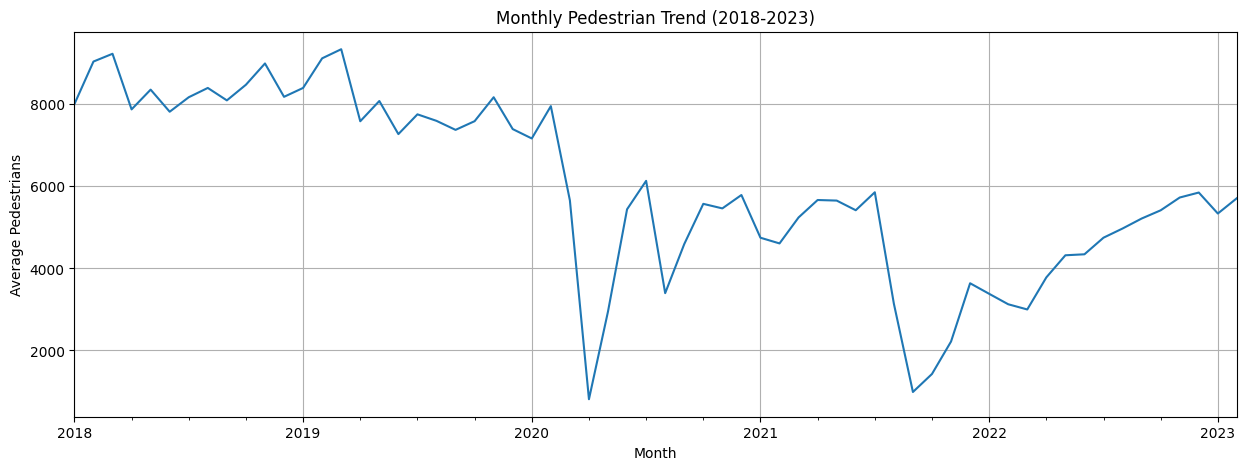

In [23]:
#Trend Analysis Over Time
dfPD['Datetime'] = pd.to_datetime(dfPD['Datetime'])
monthly_trend = dfPD.set_index('Datetime').resample('M')['Total_Pedestrians'].mean()

plt.figure(figsize=(15, 5))
monthly_trend.plot()
plt.xlabel('Month')
plt.ylabel('Average Pedestrians')
plt.title('Monthly Pedestrian Trend (2018-2023)')
plt.grid()
plt.show()


In [24]:
#Seasonal Analysis (Day of the Week)
dfPD['DayOfWeek'] = pd.to_datetime(dfPD['Datetime']).dt.day_name()
daily_avg = dfPD.groupby('DayOfWeek')['Total_Pedestrians'].mean()
print(daily_avg)


DayOfWeek
Friday       7187.459108
Monday       5644.688735
Saturday     6073.391419
Sunday       4225.890799
Thursday     6334.235285
Tuesday      6015.523463
Wednesday    6371.482807
Name: Total_Pedestrians, dtype: float64


<ipython-input-25-e8dc49045853>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_avg.index, y=daily_avg.values, palette='coolwarm')


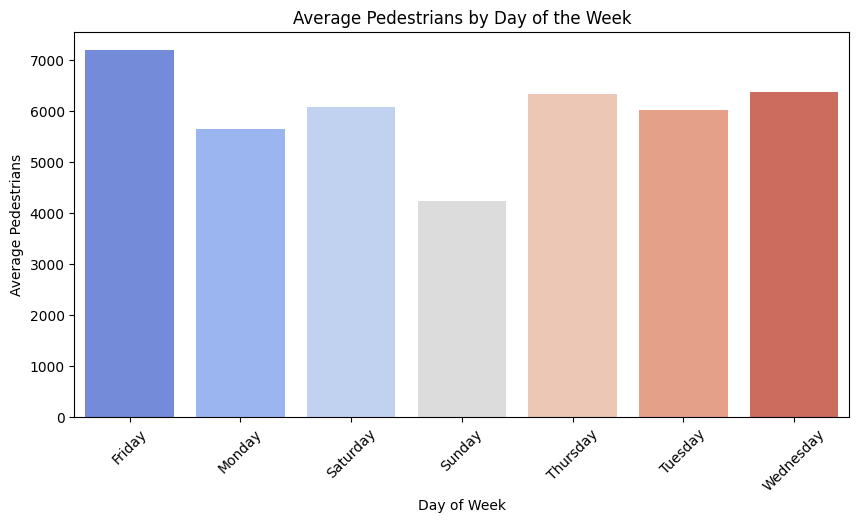

In [25]:
#Seasonal Analysis (Day of the Week)
dfPD['DayOfWeek'] = pd.to_datetime(dfPD['Datetime']).dt.day_name()
daily_avg = dfPD.groupby('DayOfWeek')['Total_Pedestrians'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=daily_avg.index, y=daily_avg.values, palette='coolwarm')
plt.xlabel('Day of Week')
plt.ylabel('Average Pedestrians')
plt.title('Average Pedestrians by Day of the Week')
plt.xticks(rotation=45)
plt.show()


In [33]:
dfPD.columns


Index(['Datetime', 'Total_Pedestrians', 'Year', 'Hour', 'DayOfWeek'], dtype='object')

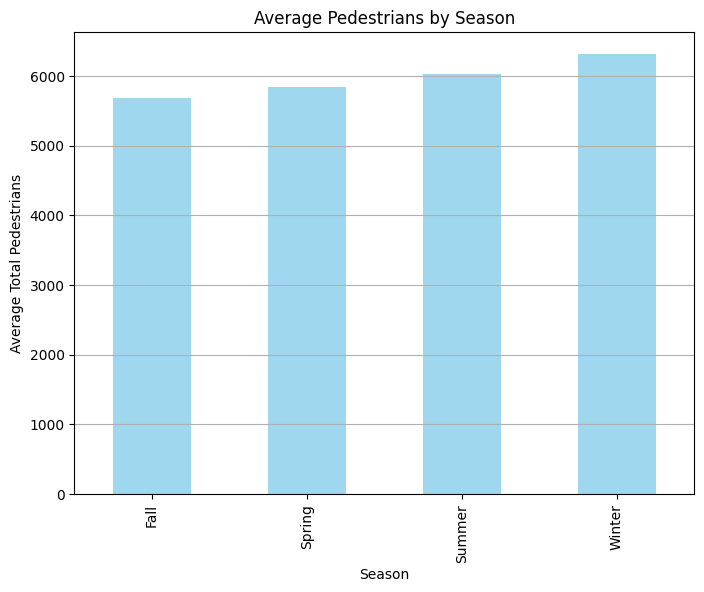

In [34]:
import matplotlib.pyplot as plt

# Ensure 'Datetime' is in datetime format
dfPD['Datetime'] = pd.to_datetime(dfPD['Datetime'])

# Add the 'Month' column from the 'Datetime' column
dfPD['Month'] = dfPD['Datetime'].dt.month

# Map the 'Season' column based on the 'Month'
dfPD['Season'] = dfPD['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# Group by 'Season' and calculate average pedestrians
seasonal_pedestrians = dfPD.groupby('Season')['Total_Pedestrians'].mean()

# Plot the average pedestrians by season
plt.figure(figsize=(8, 6))
seasonal_pedestrians.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Average Pedestrians by Season')
plt.xlabel('Season')
plt.ylabel('Average Total Pedestrians')
plt.grid(axis='y')
plt.show()


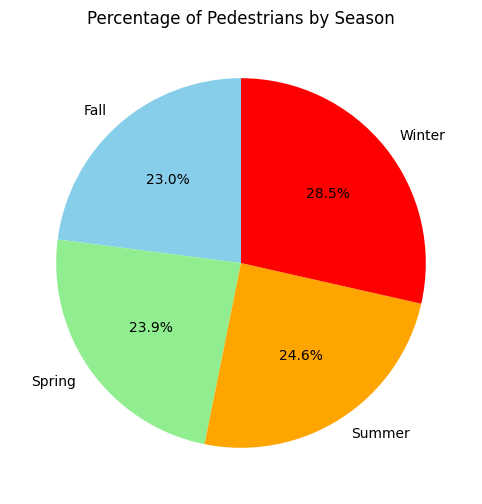

In [38]:
# Calculate percentage of pedestrians by season
seasonal_pedestrians_total = dfPD.groupby('Season')['Total_Pedestrians'].sum()
seasonal_percentage = (seasonal_pedestrians_total / seasonal_pedestrians_total.sum()) * 100

# Plot the percentages
plt.figure(figsize=(8, 6))
seasonal_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'orange', 'red'])
plt.title('Percentage of Pedestrians by Season')
plt.ylabel('')  # Hide y-label for a cleaner pie chart
plt.show()


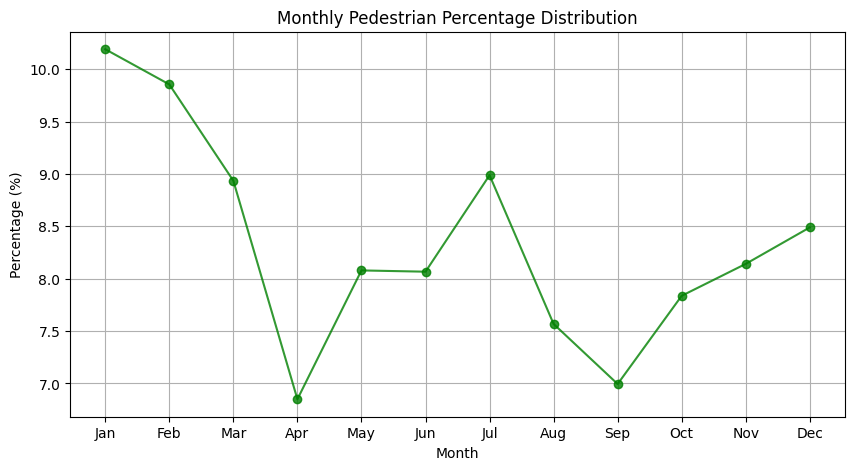

In [39]:
monthly_pedestrians_total = dfPD.groupby('Month')['Total_Pedestrians'].sum()
monthly_percentage = (monthly_pedestrians_total / monthly_pedestrians_total.sum()) * 100

plt.figure(figsize=(10, 5))
monthly_percentage.plot(kind='line', marker='o', color='green', alpha=0.8)
plt.title('Monthly Pedestrian Percentage Distribution')
plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()


In [26]:
# Define the path to the excel file (replace with your file path on Google Drive)
file_path = '/content/MyDrive/MyDrive/df_combined.csv'

In [27]:
df_combined = pd.read_csv(file_path)

In [28]:
df_combined.head()

Datetime        NO2      PM10     PM2.5         RH       Temp  \
0  2018-01-10 00:00:00  13.221000  8.040000  3.200000  65.840000  14.360000   
1  2018-01-10 01:00:00  18.695833  7.883333  3.033333  64.950000  14.350000   
2  2018-01-10 02:00:00   9.359167  6.933333  2.683333  64.433333  14.350000   
3  2018-01-10 03:00:00  19.020667  9.766667  3.116667  64.866667  14.333333   
4  2018-01-10 04:00:00  19.139500  7.700000  3.050000  64.866667  14.383333   

           WD        WS   TrafficV  
0  149.680000  0.340000  60.000000  
1  168.050000  0.216667  51.181818  
2  169.316667  0.250000  32.727273  
3  155.066667  0.283333  28.090909  
4  151.466667  0.250000  22.909091

In [29]:
df_combined.columns


Index(['Datetime', 'NO2', 'PM10', 'PM2.5', 'RH', 'Temp', 'WD', 'WS',
       'TrafficV'],
      dtype='object')

In [31]:
# Ensure Datetime columns are in datetime format
df_combined['Datetime'] = pd.to_datetime(df_combined['Datetime'])
dfPD['Datetime'] = pd.to_datetime(dfPD['Datetime'])

# Merge the two dataframes on the Datetime column
df_complete = pd.merge(df_combined, dfPD, on='Datetime', how='inner')

# Set Datetime as the index
df_complete.set_index('Datetime', inplace=True)

# Display the resulting dataframe
print(df_complete.head())


                           NO2      PM10     PM2.5         RH       Temp  \
Datetime                                                                   
2018-01-10 00:00:00  13.221000  8.040000  3.200000  65.840000  14.360000   
2018-01-10 01:00:00  18.695833  7.883333  3.033333  64.950000  14.350000   
2018-01-10 02:00:00   9.359167  6.933333  2.683333  64.433333  14.350000   
2018-01-10 03:00:00  19.020667  9.766667  3.116667  64.866667  14.333333   
2018-01-10 04:00:00  19.139500  7.700000  3.050000  64.866667  14.383333   

                             WD        WS   TrafficV  Total_Pedestrians  Year  \
Datetime                                                                        
2018-01-10 00:00:00  149.680000  0.340000  60.000000             1908.0  2018   
2018-01-10 01:00:00  168.050000  0.216667  51.181818             1372.0  2018   
2018-01-10 02:00:00  169.316667  0.250000  32.727273             1081.0  2018   
2018-01-10 03:00:00  155.066667  0.283333  28.090909          

In [44]:
# Save  CSV file
df_complete.to_csv('df_complete.csv', index=False)

print("DataFrame saved as 'df_complete.csv'.")

DataFrame saved as 'df_complete.csv'.


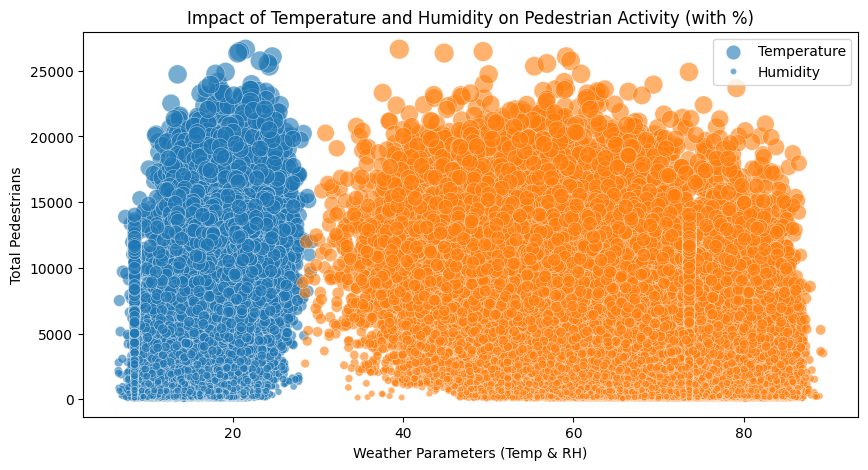

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total pedestrians
total_pedestrians = df_complete['Total_Pedestrians'].sum()

# Calculate the percentage of Total Pedestrians for each row
df_complete['Pedestrian_Percentage'] = (df_complete['Total_Pedestrians'] / total_pedestrians) * 100

# Create the scatterplot with percentage data
plt.figure(figsize=(10, 5))

# Scatter plot for Temperature vs Pedestrian count
# Removing the 'label' argument here
sns.scatterplot(data=df_complete, x='Temp', y='Total_Pedestrians', size='Pedestrian_Percentage', sizes=(20, 200), alpha=0.6)

# Scatter plot for Humidity vs Pedestrian count
# Removing the 'label' argument here
sns.scatterplot(data=df_complete, x='RH', y='Total_Pedestrians', size='Pedestrian_Percentage', sizes=(20, 200), alpha=0.6)

# Title and labels
plt.title('Impact of Temperature and Humidity on Pedestrian Activity (with %)')
plt.xlabel('Weather Parameters (Temp & RH)')
plt.ylabel('Total Pedestrians')

# Manually adding legend entries
# This avoids the conflict with the internal labeling of seaborn
plt.legend(labels=['Temperature', 'Humidity'])

# Show plot
plt.show()


<Figure size 1000x500 with 0 Axes>

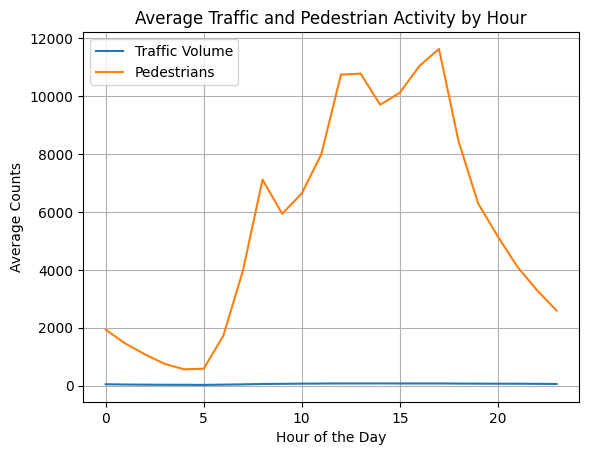

In [36]:
#Daily Patterns in Traffic and Pedestrian Counts
df_complete['Hour'] = df_complete.index.hour

hourly_stats = df_complete.groupby('Hour')[['TrafficV', 'Total_Pedestrians']].mean()

plt.figure(figsize=(10, 5))
hourly_stats.plot()
plt.title('Average Traffic and Pedestrian Activity by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Counts')
plt.legend(['Traffic Volume', 'Pedestrians'])
plt.grid()
plt.show()


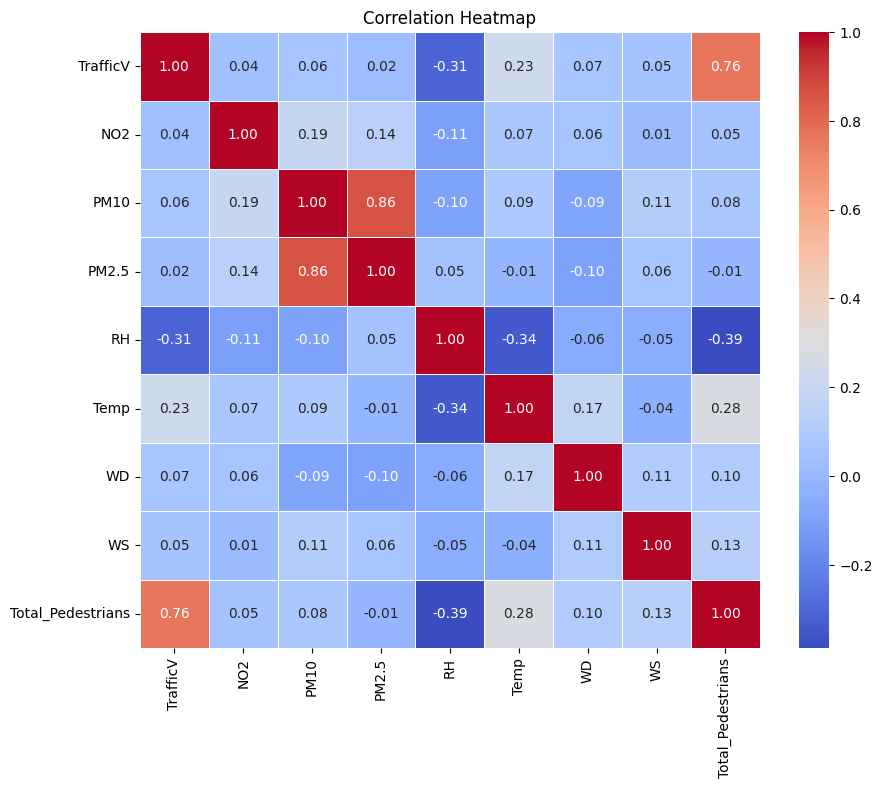

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for relevant columns
columns_of_interest = ['TrafficV', 'NO2', 'PM10', 'PM2.5', 'RH', 'Temp', 'WD', 'WS','Total_Pedestrians']
correlation_matrix = df_complete[columns_of_interest].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

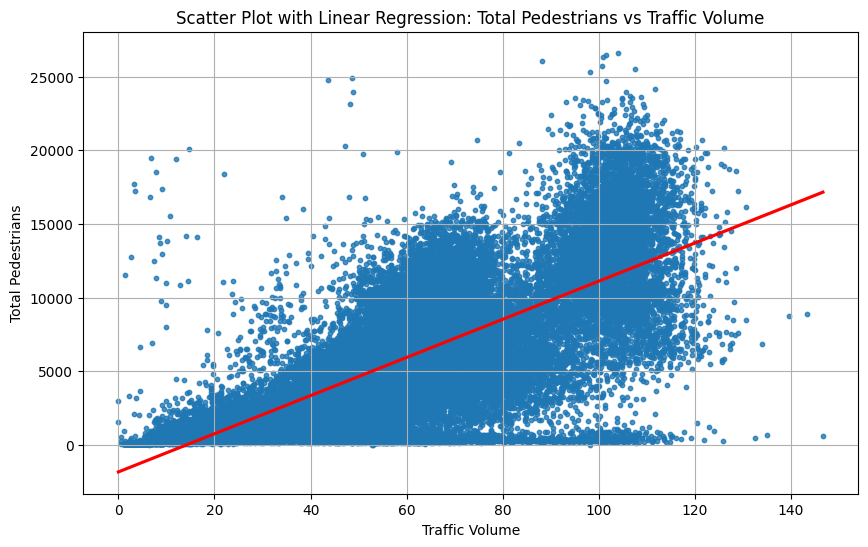

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df_complete, x='TrafficV', y='Total_Pedestrians', scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Scatter Plot with Linear Regression: Total Pedestrians vs Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Total Pedestrians')
plt.grid(True)
plt.show()


In [46]:
# Calculate the Pearson correlation coefficient
correlation = df_complete[['Total_Pedestrians', 'TrafficV']].corr().iloc[0, 1]
print(f"Pearson correlation coefficient between Total Pedestrians and Traffic Volume: {correlation:.2f}")


Pearson correlation coefficient between Total Pedestrians and Traffic Volume: 0.76


<Figure size 1400x700 with 0 Axes>

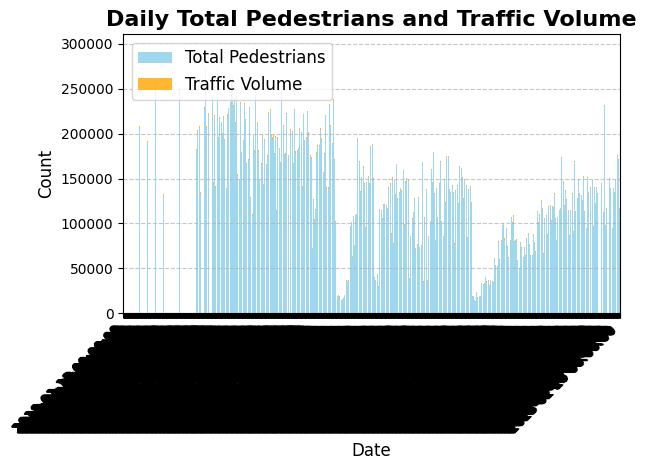

In [49]:
import matplotlib.pyplot as plt

# Group by day to calculate daily totals for Total Pedestrians and Traffic Volume
daily_data = df_complete.resample('D').agg({'Total_Pedestrians': 'sum', 'TrafficV': 'sum'})

# Plot the results with a better visualization
plt.figure(figsize=(14, 7))

# Create a stacked bar plot
daily_data[['Total_Pedestrians', 'TrafficV']].plot(kind='bar', stacked=True, width=0.8, alpha=0.8, color=['skyblue', 'orange'])

# Add title and labels
plt.title('Daily Total Pedestrians and Traffic Volume', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the legend and improve layout
plt.legend(['Total Pedestrians', 'Traffic Volume'], loc='upper left', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()
